In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import squarify
import pycountry

transit2014 = pd.read_csv(r"datasets/eu2014transit.csv", sep=",", header=0, na_values='-')
transit2014 = transit2014.dropna()
transit2014["Total"] = transit2014["Railway"] + transit2014["Tram & Metro"] + transit2014["Bus & Coach"] + transit2014["Cars"]
transit2014["%Pub"] = (1 - (transit2014["Cars"] / transit2014["Total"])) * 100
transit2014["%Pub"] = transit2014["%Pub"].round().astype(int)
transit2014 = transit2014.sort_values(by="%Pub")

# Change UK to GB and EL to GR to conform with ISO standards
transit2014.loc[transit2014["Country"]=="UK", "Country"] = "GB"
transit2014.loc[transit2014["Country"]=="EL", "Country"] = "GR"

transit2014.head()

,Country,Railway,Tram & Metro,Bus & Coach,Cars,Total,%Pub
21,PT,3.9,1.0,5.6,83.3,93.8,11
27,GB,64.7,12.5,41.1,654.2,772.5,15
25,FI,3.9,0.5,7.5,65.5,77.4,15
4,DE,89.5,16.8,63.2,920.8,1090.3,16
10,HR,0.9,0.6,3.6,26.1,31.2,16


In [2]:
## calculate average % public transit usage
total_usage = transit2014["Total"].sum()
print(total_usage)
avg_pub = 1 - (transit2014["Cars"].sum() / total_usage)
total_usage = "{:,}".format(round(total_usage * 100))
avg_pub = str(round(avg_pub * 100)) + "%"

5745.799999999999


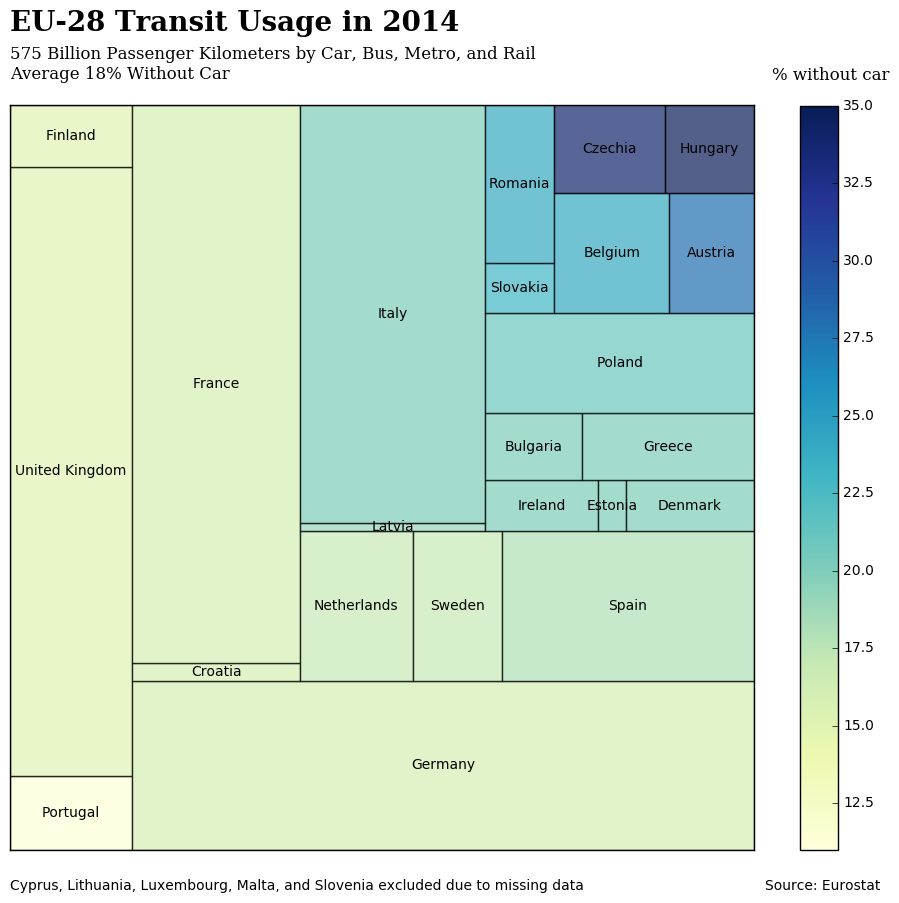

In [3]:
fig = plt.figure(figsize=(12, 10))

# color scale on the population
cmap = matplotlib.cm.YlGnBu
norm = matplotlib.colors.Normalize(vmin=transit2014["%Pub"].min(), vmax=transit2014["%Pub"].max())
colors = [cmap(norm(value)) for value in transit2014["%Pub"]]

# convert country codes to names using pycountry for plot labels
labels = [pycountry.countries.get(alpha_2=country).name for country in transit2014["Country"]]

# create plot using squarify, adjust chart using matplotlib
ax = squarify.plot(transit2014["Total"], label=labels, color=colors, alpha=0.7)
ax.set_xticks([])
ax.set_yticks([])
fig.suptitle("EU-28 Transit Usage in 2014", fontsize=20, ha="left", family="serif", x=.125, fontweight='bold')
ax.set_title("575 Billion Passenger Kilometers by Car, Bus, Metro, and Rail\nAverage %s Without Car\n" % (avg_pub), fontsize=12, ha="left", x=0, family="serif")
img = plt.imshow([transit2014["%Pub"]], cmap=cmap)
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=.96)
fig.text(.76, .91, "% without car", fontsize=12, family="serif")

fig.text(.125, 0.1, "Cyprus, Lithuania, Luxembourg, Malta, and Slovenia excluded due to missing data", fontsize=10, ha="left")
fig.text(.85, 0.1, "Source: Eurostat", fontsize=10, ha="right")

plt.show()